In [35]:
import pandas as pd

In [36]:
data_actives = pd.read_csv('actives_docked.csv')
data_decoys = pd.read_csv('decoys_docked.csv')

In [37]:
data_decoys['act_bin'] = 0
data_actives['act_bin'] = 1

In [38]:
#CONCATANATE
data = pd.concat([data_actives, data_decoys])

In [39]:
data = data[['name', 'score', 'act_bin']]

In [40]:
data = data.sort_values('score', ascending=True)

In [41]:
#Przyczyna błędu!!!
data = data.drop_duplicates('name')

In [47]:
predict = (data['score']).tolist()
experim = (data['act_bin']).tolist()

In [28]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [29]:
fpr, tpr, thresh = roc_curve(experim, predict) # do wyliczania krzywej ROC 
roc_auc = auc(fpr,tpr) # do wyliczania powierzchni pod krzywa

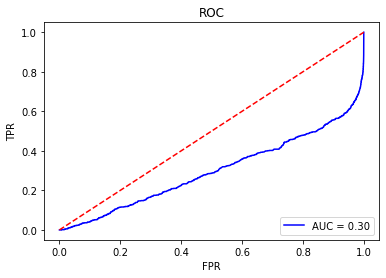

In [30]:
plt.title("ROC")
plt.plot(fpr,tpr, 'b', label="AUC = %.2f" % roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1], 'r--')
plt.xlabel("FPR")
plt.ylabel("TPR")

plt.show()

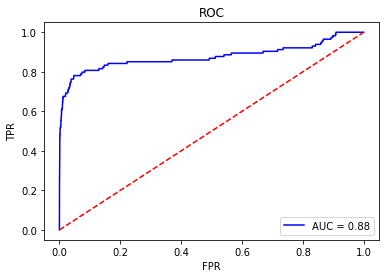

In [52]:
predict = (-data['score']).tolist()

fpr, tpr, thresh = roc_curve(experim, predict)
roc_auc = auc(fpr,tpr) 

plt.title("ROC")
plt.plot(fpr,tpr, 'b', label="AUC = %.2f" % roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1], 'r--')
plt.xlabel("FPR")
plt.ylabel("TPR")

plt.show()
#TRP - pstwo wykrycia aktywnosci
#FPR - pstwo falszywego wykrycia aktywnoscig

In [83]:
'''1. Napisz skrypt do wyliczania współczynnika wzbogacania (EF)
jako input użytkownik podaje ile jest TP, ile jest wszystkich molekuł oraz ile TP znalezione pierwszym % listy.
jako output skrypt podaje jaki jest EF1% dla tych danych oraz maksymalny EF1% jaki można było uzyskać.'''
import math
#TP = ile jest wszystkich molekuł prawdziwych
#N - ile jest wszystkich molekul
#tp_proc - ile jest TP znalezione w pierwszym % listy
#proc - odsetek prawdziwych


def EF_proc(tp: int, N: int, tp_proc: int, proc = 1):
    prop_size = math.floor(proc/100 * N)
    if tp_proc > prop_size: 
        return print(f'Prosze podac poprawna wartosc tp_proc, N i % dla EF -> W {proc}% listy jest wiecej TP niz elementow')
    
    print(f'EF{proc}%:    EF{proc}%max:')
    return tp_proc/prop_size * N / tp, min(tp, prop_size)/prop_size *  N / tp

EF_proc(10, 1000, 2)


EF1%:    EF1%max:


(20.0, 100.0)